# Model Task Types - Linear Regression

> Objectives:
>
> - Generate a synthetic housing dataset with features such as area, number of bedrooms, and house age to simulate real-world housing data.
> - Utilize **SciKit Learn** for data preprocessing and model training, leveraging its intuitive API.
> - Build and evaluate a regression model, focusing on shallow learning techniques to predict house prices.
> - Visualize and compare predicted prices with actual values for better interpretability and insights.

### Imports

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from helpers import get_houses_data, plot_results

### Step 1: Create and Explore a Synthetic Dataset

To kick off the process, we generate a **synthetic housing dataset** using the `get_houses_data` function. This dataset includes features like the number of bedrooms, house area (in square feet), age of the house, and the corresponding price. Don't worry too much about how this dataset is created—it's outside the scope of this lesson. However, if you're curious, you can explore the `helpers.py` file for more details.

We then organize this data into a **DataFrame** using `pandas`. A DataFrame is a tabular structure similar to a spreadsheet, which makes it easy to analyze and manipulate the data. In this step, converting the area from thousands of square feet to square feet improves clarity and keeps the units consistent. Printing the first few rows gives us a quick overview of the dataset we’ll be working with.

Finally, we print the first few rows of the dataset to get a preview of the data we'll be working with.

In [12]:
# Get the sample houses
bedrooms, square_feet, age, price = get_houses_data()

# Create a DataFrame with the data
df = pd.DataFrame({
    'Bedrooms': bedrooms,
    'Area': square_feet * 1000,  # Convert area to square feet
    'Age': age,
    'Price': price
})

# Print the first few rows to demonstrate the data
print("Sample Data:\n")
print(df.head().to_string(index=False))

Sample Data:

 Bedrooms        Area  Age         Price
        4 2795.903221   10 632416.130011
        5 2640.092587   27 609292.740036
        3 1678.681618   24 419484.236509
        5  828.984280   49 325600.790991
        5 1489.963805   22 450407.285907


### Step 2: Splitting Our Data

In this step, we **split** our data into features and the target variable. The features (`X`) include the house area, number of bedrooms, and age, while the target (`y`) is the house price.

We then use the `train_test_split` function to divide the data into two parts: one for training the model and the other for testing it. We allocate **80% of the data for training** and **20% for testing**. This is a common split because it provides enough data to train the model while reserving a sufficient portion for testing its performance on unseen data.

The `random_state=42` ensures that we get the same split every time we run the code, making the results reproducible. The number `42` is arbitrary—it's simply a seed value used to initialize the random number generator.

You can uncomment the print statements below to preview a sample of the training and testing sets.

In [13]:
# Split features and target
X = df[["Area", "Bedrooms", "Age"]]
y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features: Area, Bedrooms, Age
    y,  # Target: Price
    test_size=0.2,  # 20% of the data will be used for testing, the rest for training
    random_state=42
)

# Display a preview of the training and testing sets
# print("Training Features (X_train):\n", X_train.head().to_string(index=False))
# print("\nTesting Features (X_test):\n", X_test.head().to_string(index=False))
# print("\nTraining Target (y_train):\n", y_train.head().to_string(index=False))
# print("\nTesting Target (y_test):\n", y_test.head().to_string(index=False))


### Step 3: Model Instantiation

In this step, we instantiate a **Linear Regression** model. Linear regression is a simple, yet powerful **shallow learning algorithm** that assumes a linear relationship between the input features (e.g., area, bedrooms, age) and the target variable (price). It tries to fit the best straight line (or hyperplane in higher dimensions) to predict the target based on the input features.
This approach works well for problems like this where the relationship between features and target is relatively straightforward and can be approximated by a line.

We use `LinearRegression` from the `sklearn` library, which provides a well-optimized and easy-to-use implementation of this model. It handles the underlying math and fitting process for us, so we can focus on the application.

#### Example:

For example, imagine you're trying to predict **house prices** based on the **size of the house** (square footage). In general, **larger houses** tend to cost more. Linear regression helps by learning how much the price increases with each additional square foot. It does this by finding the best **"weight"** or importance for square footage in relation to the price.

So, if the model learns that for every **100 square feet**, the price increases by a certain amount, it can use that knowledge to predict prices for other houses with different sizes.

In [14]:
model = LinearRegression()

### Step 4: Training the Model

In this step, we **train the model** using the `fit` method. Training a model means we are allowing it to learn from the data so that it can make predictions on new, unseen data.

We provide the model with **features** (`X_train`), which include the house area, number of bedrooms, and age, and the **target** (`y_train`), which is the house price. The model uses this data to learn the relationship between the features and the target. 

The goal of training is for the model to adjust its internal parameters (like weights) so that it can predict the target variable (price) as accurately as possible based on the features. 

In simple terms, this is like teaching the model by showing it many examples of houses with known prices, and it learns how to predict the price for new houses.

In [15]:
model.fit(
    # sample features: area, bedrooms, age
    X_train,
    # expected output target: price
    y_train,
)

LinearRegression()

### Step 5: Generating the Predictions

After training the model, we use it to **make predictions**. In this step, we pass the **test features** (`X_test`) to the model, which has already learned from the training data. The model then predicts the **prices** for the houses in the test set that it has never seen before.

The `predict` method generates these predictions by applying the patterns and relationships it learned during training to the test data.
The model will attempt to make its best guess based on what it learned from the training data.

In [16]:
# Use the 20% split of our date to make predictions
predictions = model.predict(X_test)

### Step 6: Comparing Actual vs Predicted Prices

We create a **DataFrame** to compare the **actual** and **predicted** prices.

We also calculate the **error** between the actual and predicted prices by subtracting the predicted prices from the expected ones, rounding to the nearest whole number.

Finally, we display the first 10 rows of the results for a quick overview.

In [17]:
# Create a DataFrame to display actual vs predicted prices
results_df = pd.DataFrame(
    {
        "Area": X_test["Area"].tolist(),  # Area of the house
        "Bedrooms": X_test["Bedrooms"].tolist(),  # Number of bedrooms
        "Age:": X_test["Age"].tolist(),  # Age of the houuse
        "Expected Price": y_test.tolist(),        # Expected prices from the dataset
        "Predicted Price": predictions.tolist(),  # Predicted prices from the model
    }
)

# Calculate the error between actual and predicted prices (round the predicted prices to the nearest whole number)
results_df["Price Error"] = results_df["Expected Price"] - results_df["Predicted Price"].round(0).astype(int)

# Display the results (only the first 10 rows)
print(results_df.head(10))

          Area  Bedrooms  Age:  Expected Price  Predicted Price   Price Error
0  1557.178662         5    27   465621.583425    455386.763322  10234.583425
1  1246.589601         5    32   401020.915079    403814.783780  -2794.084921
2  1428.170995         1    45   296819.408620    298177.997661  -1358.591380
3  2154.456289         1    17   432472.261238    435688.354284  -3215.738762
4  1253.117399         2    28   328286.458726    319483.674385   8802.458726
5  2719.872621         2    34   537865.008233    532319.456939   5546.008233
6  1740.888536         4    40   444417.267001    439522.500568   4894.267001
7  2527.535415         5    20   614992.491209    607568.810646   7423.491209
8  1519.024499         4    15   438335.323859    432316.076420   6019.323859
9  2795.903221         4    10   632416.130011    628202.625736   4213.130011


### Step 7: Visualizing the Results

In this step, we create a **scatter plot** to visually compare the **expected prices** (from the test data) and **predicted prices** (from the model). Each house listing is represented by two points: one for the expected price and one for the predicted price.

The points are connected by **dashed lines** to highlight the differences between the actual and predicted values for each listing. This gives us a clear view of how well the model performed for each house.

By examining this plot, we can easily spot:
- Listings where the model did a great job predicting the price (points close to each other)
- Listings where the model's prediction was off (points further apart)

This visualization helps to quickly identify patterns or areas where the model may need improvement.

The `plot_results` implementation is out of the scope of the lesson, but if you're curious, you can inspect the `helpers.py` file for more details on how the plotting function is set up.

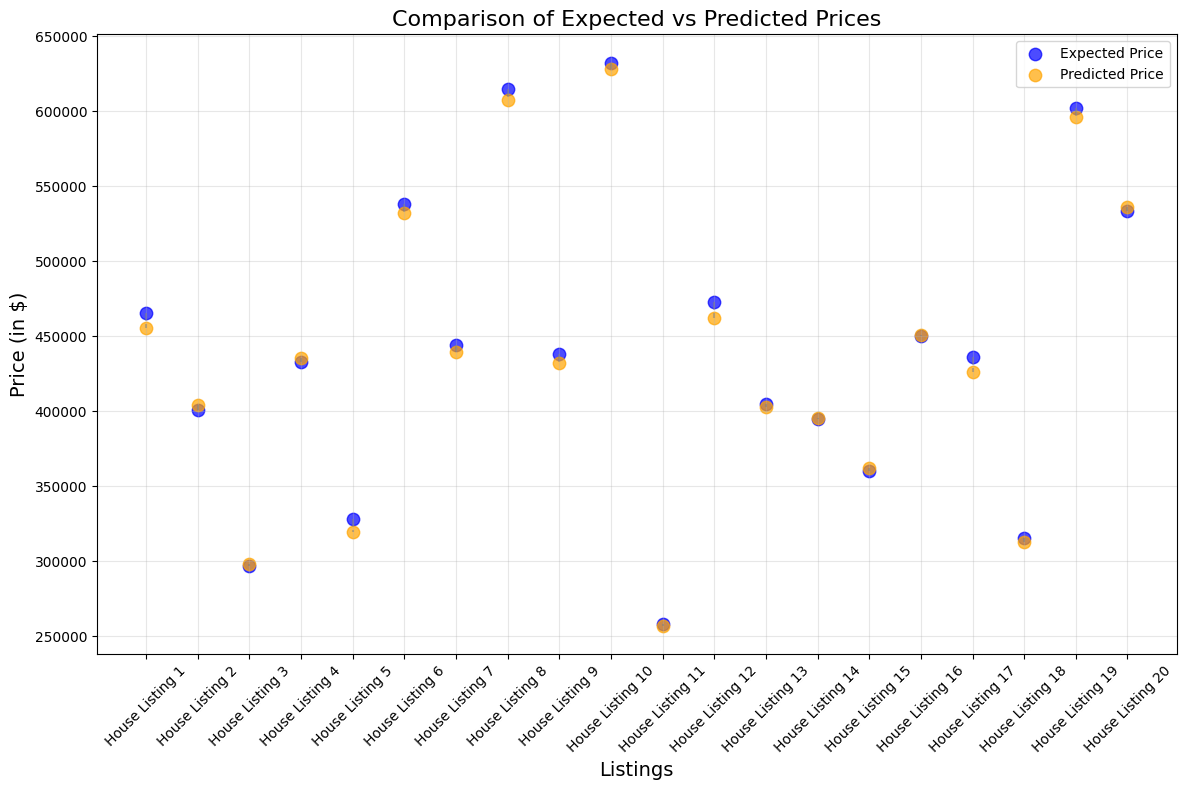

In [18]:
# Plot setup
plot_results(results_df)
